In [12]:
# Imports
import os
import sqlite3
from chemkin_CS207_G9.chemkin.parser.database_query import CoeffQuery
from chemkin_CS207_G9.chemkin.parser.xml2dict import xml2dict
from chemkin_CS207_G9.chemkin.reaction.Reaction import Reaction
import chemkin_CS207_G9.chemkin.data as data_folder
import graphviz 
from graphviz import Digraph


# Paths
BASE_DIR = os.path.dirname(os.path.abspath(data_folder.__file__))
path_xml = os.path.join(BASE_DIR, 'rxns_reversible.xml') # path to the .xml file
path_sql = os.path.join(BASE_DIR, 'nasa_thermo.sqlite')  # path to the .sqlite file

In [13]:
# Preparing to query NASA Coefficients
nasa_query = CoeffQuery(path_sql)
db = sqlite3.connect(path_sql)
cursor = db.cursor()

# Selecting all coefficients from LOW database
query = '''SELECT * FROM LOW'''
cursor.execute(query).fetchall();

In [24]:
# Loading Reactions and Species from xml file
reader = xml2dict()
reader.parse(path_xml)
info = reader.get_info()
# Getting species
species = info[0]
# Getting reactions
reactions = [Reaction(**r) for r in info[1]]

[{'coeffParams': {'A': 3547000000000000.0, 'b': -0.406, 'E': 16599.0}, 'ID': 'reaction01', 'reversible': 'yes', 'TYPE': 'Elementary', 'reactants': {'H': 1, 'O2': 1}, 'products': {'O': 1, 'OH': 1}, 'coeffLaw': 'modifiedArrhenius'}, {'coeffParams': {'A': 50800.0, 'b': 2.67, 'E': 6290.0}, 'ID': 'reaction02', 'reversible': 'yes', 'TYPE': 'Elementary', 'reactants': {'O': 1, 'H2': 1}, 'products': {'H': 1, 'OH': 1}, 'coeffLaw': 'modifiedArrhenius'}, {'coeffParams': {'A': 216000000.0, 'b': 1.51, 'E': 3430.0}, 'ID': 'reaction03', 'reversible': 'yes', 'TYPE': 'Elementary', 'reactants': {'H2': 1, 'OH': 1}, 'products': {'H2O': 1, 'H': 1}, 'coeffLaw': 'modifiedArrhenius'}, {'coeffParams': {'A': 2970000.0, 'b': 2.02, 'E': 13400.0}, 'ID': 'reaction04', 'reversible': 'yes', 'TYPE': 'Elementary', 'reactants': {'O': 1, 'H2O': 1}, 'products': {'OH': 2}, 'coeffLaw': 'modifiedArrhenius'}, {'coeffParams': {'A': 16600000000000.0, 'E': 823.0}, 'ID': 'reaction05', 'reversible': 'yes', 'TYPE': 'Elementary', 're

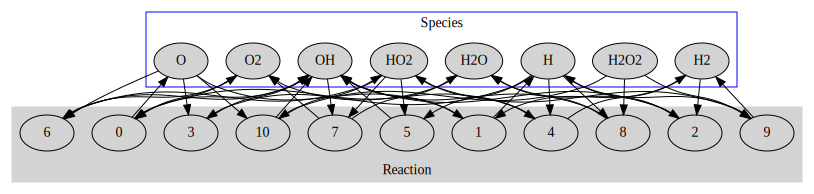

In [26]:
# Testing Bipartite Graph

bipartite = Digraph(comment='Bipartite Graph')
with bipartite.subgraph(name='cluster_1') as c:
    c.attr(style='filled')
    c.attr(label='Reaction', labelloc = 'b')
    c.attr(color='lightgrey')
    for idx, r in enumerate(reactions):
        c.node(str(idx))
        
with bipartite.subgraph(name='cluster_0') as c:
    c.node_attr.update(style='filled')
    c.attr(color='blue')
    c.attr(label='Species')
    for s in species:
        c.node(s)
        
for idx, r in enumerate(reactions):
    for k1 in r.getReactants():
        bipartite.edge(k1, str(idx))
    for k2 in r.getProducts():
        bipartite.edge(str(idx), k2)
    
# Print the graph
bipartite

In [28]:
# Defining Style

styles = {
    'graph': {
        'label': 'A Fancy Graph',
        'fontsize': '16',
        'fontcolor': 'white',
        'bgcolor': '#333333',
        'rankdir': 'BT',
    },
    'nodes': {
        'fontname': 'Helvetica',
        'shape': 'hexagon',
        'fontcolor': 'white',
        'color': 'white',
        'style': 'filled',
        'fillcolor': '#006699',
    },
    'edges': {
        'style': 'dashed',
        'color': 'white',
        'arrowhead': 'open',
        'fontname': 'Courier',
        'fontsize': '12',
        'fontcolor': 'white',
    }
}


In [31]:
top = Digraph('Top graph',comment='Hierarchical Graph')
bot = Digraph('Bot graph')
mid_top = Digraph('Mid Top graph')
mid_bot = Digraph('Mid Bot graph')
mid_bot.graph_attr.update(rank='min')
mid_bot.graph_attr.update(rank='min')
reactant_count = {s:0 for s in species}
product_count = {s:0 for s in species}

def is_reactant(s):
    for r in reactions:
        if s in r.getReactants().keys():
            return True

def is_product(s):
    for r in reactions:
        if s in r.getProducts().keys():
            return True

        
for s in species:
    if is_reactant(s):
        reactant_count[s]+=1
    if is_product(s):
        product_count[s]+=1
    
for s in species:
    if reactant_count[s] == 0:
        top.node(s)
    elif product_count[s] == 0:
        bot.node(s)
    elif reactant_count[s] > product_count[s]:
        mid_top.node(s)
    elif reactant_count[s] < product_count[s]:
        mid_bot.node(s)
    
for r in reactions:
    for idx, k1 in enumerate(r.getReactants().keys()):
        for i,k in enumerate( r.getProducts() ):
            dot.edge(k1, k, color = "red")
        for jdx, k2 in enumerate(r.getReactants().keys()):
            if k1 != k2 and jdx > idx:
                dot.edge(k1, k2, arrowhead = 'none')   
                
dot.graph_attr.update(('edges' in styles and styles['edges']) or {})

NameError: name 'dot' is not defined

In [32]:
# Class for Hierarchical graph

class Hierarchical():
    
    def __init__():
        top = Digraph('Top graph',comment='Hierarchical Graph')
        bot = Digraph('Bot graph')
        mid_top = Digraph('Mid Top graph')
        mid_bot = Digraph('Mid Bot graph')

SyntaxError: unexpected EOF while parsing (<ipython-input-32-f0283f3590f0>, line 5)